# Generative AI recreating football game


This is an exploratory data analysis of accelerometer data capturing the gait of football players during a game. The data was collected using the Meteor tracker, which provides 3-dimensional acceleration measurements at a frequency of 50Hz. The objective of this analysis is to gain insights into player movements and actions during the game based on the acceleration data.

## Dataset Overview
The dataset consists of a collection of gaits, where each gait represents a player's movement during a specific instance of the game. Each gait is associated with an action label, indicating the type of action performed by the player during that period. The actions include categories such as dribble, tackle, shot, pass, run, walk, rest, and more.

In [9]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from JSON file
with open('footbar/match_1.json', 'r') as json_file:
    gaits_data = json.load(json_file)

# Convert the data into a DataFrame for easier analysis
df = pd.DataFrame(gaits_data)

# Basic overview of the data
print(df.info())
print(df.head())

# Summary statistics by action label
action_summary = df.groupby('label')['norm'].describe()
print(action_summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   574 non-null    object
 1   norm    574 non-null    object
dtypes: object(2)
memory usage: 9.1+ KB
None
  label                                               norm
0  walk  [23.177037336396975, 23.36152528524938, 21.535...
1  walk  [20.998214383911275, 19.182798059840767, 18.27...
2  walk  [21.95259682019565, 20.62720484424047, 22.5554...
3  walk  [19.39209748358647, 19.30460665293087, 18.9787...
4  rest  [22.069263037713093, 19.672270483203395, 19.88...
        count unique                                                top freq
label                                                                       
cross       3      3  [57.65439590486032, 111.02478206918458, 60.186...    1
dribble    42     42  [26.46623868835221, 24.38342371688526, 19.0440...    1
pass       24     24  [17.702179567439817, 20

## Data Preprocessing
The initial dataset was loaded from a JSON file, and the 'norm' column, which contains the norm of 3-dimensional acceleration, was converted from string representation to numerical lists. The following derived features were calculated for each gait:

Mean Acceleration: The average acceleration value during the gait.
Maximum Acceleration: The maximum acceleration value observed during the gait.
Number of Data Points: The number of acceleration data points captured during the gait.

## 1- Exploratory Data Analysis

The analysis included various approaches to gain insights into the differences between different player actions:

### Summary Statistics: 
Summary statistics were calculated for each action label, providing information on mean acceleration, maximum acceleration, and the number of data points. This allowed us to understand the central tendencies and variability of acceleration characteristics for each action. 

In [10]:
import ast

# Convert 'norm' column to numerical lists
for gait in gaits_data:
    gait['norm'] = [float(val) for val in gait['norm']]

# Create a DataFrame
df = pd.DataFrame(gaits_data)

# Calculate the mean acceleration for each gait
df['mean_acceleration'] = df['norm'].apply(np.mean)

# Calculate the maximum acceleration for each gait
df['max_acceleration'] = df['norm'].apply(np.max)

# Calculate the number of acceleration data points for each gait
df['num_data_points'] = df['norm'].apply(len)

# Summary statistics after converting 'norm' to numerical values
action_summary = df.groupby('label')[['mean_acceleration', 'max_acceleration', 'num_data_points']].describe()
print(action_summary)

        mean_acceleration                                               \
                    count        mean        std        min        25%   
label                                                                    
cross                 3.0   46.708458   4.804188  42.665303  44.052988   
dribble              42.0   52.882526  16.460026  28.116275  39.064939   
pass                 24.0   64.133278  29.625971  21.791422  37.032160   
rest                 25.0   21.833567   1.269846  20.378778  20.764220   
run                 209.0   54.404593  24.501300  21.346395  38.471540   
shot                  6.0  113.278717  53.640343  54.048415  74.492476   
tackle               20.0   70.668582  22.835458  31.670862  52.490758   
walk                245.0   28.094867   4.668603  22.009177  25.117111   

                                            max_acceleration              ...  \
                50%         75%         max            count        mean  ...   
label                  

### Box Plots: 
Box plots were utilized to visualize the distribution of mean and maximum acceleration values across different action labels. These plots highlighted the spread and potential outliers within each action category.

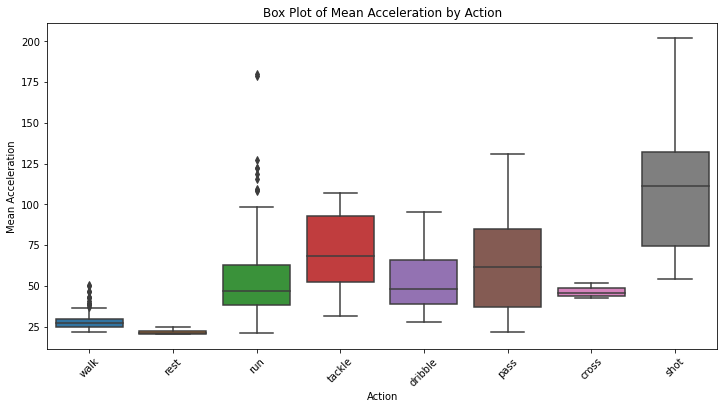

In [11]:
# Box plot of mean acceleration by action
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='mean_acceleration', data=df)
plt.xticks(rotation=45)
plt.title('Box Plot of Mean Acceleration by Action')
plt.xlabel('Action')
plt.ylabel('Mean Acceleration')
plt.show()

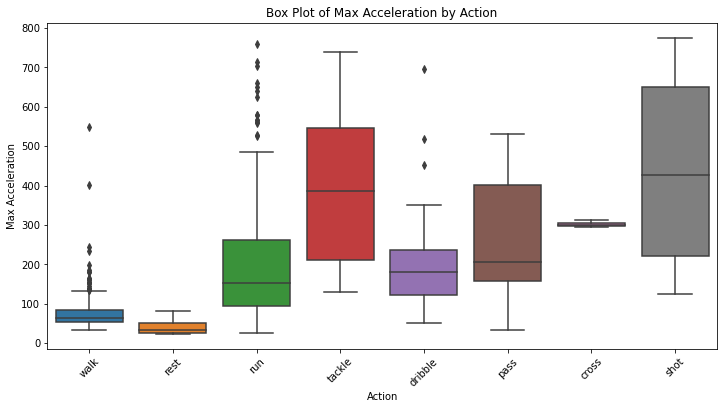

In [12]:
# Box plot of maximum acceleration by action
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='max_acceleration', data=df)
plt.xticks(rotation=45)
plt.title('Box Plot of Max Acceleration by Action')
plt.xlabel('Action')
plt.ylabel('Max Acceleration')
plt.show()

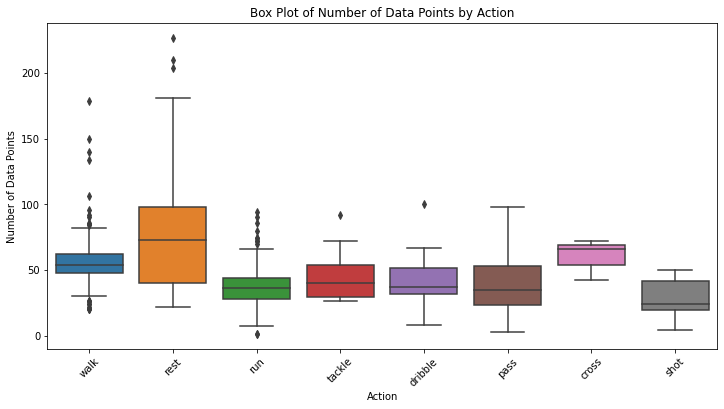

In [13]:
# Box plot of number of data points by action
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='num_data_points', data=df)
plt.xticks(rotation=45)
plt.title('Box Plot of Number of Data Points by Action')
plt.xlabel('Action')
plt.ylabel('Number of Data Points')
plt.show()

### Scatter Plots: 
Pairwise scatter plots were generated to visualize the relationships between mean and maximum acceleration. The scatter plots were color-coded based on action labels, enabling us to observe patterns and potential clusters.

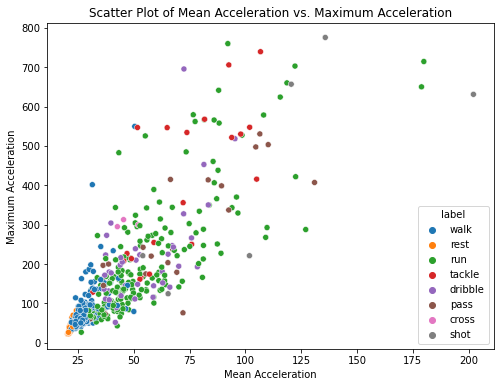

In [14]:
# Scatter plot of mean acceleration vs. maximum acceleration
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mean_acceleration', y='max_acceleration', hue='label', data=df)
plt.title('Scatter Plot of Mean Acceleration vs. Maximum Acceleration')
plt.xlabel('Mean Acceleration')
plt.ylabel('Maximum Acceleration')
plt.show()

### Correlation Heatmap: 
A correlation heatmap was created to examine the relationships between different acceleration features. The heatmap illustrated the degree of correlation between mean acceleration, maximum acceleration, and the number of data points.

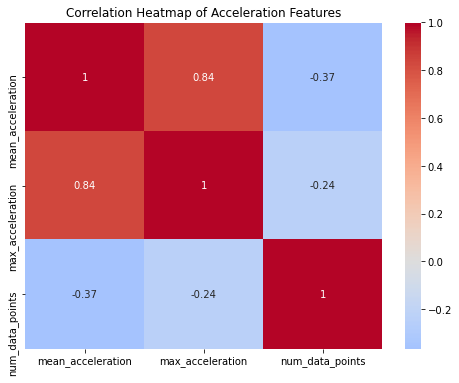

In [15]:
# Correlation heatmap of acceleration features
correlation_matrix = df[['mean_acceleration', 'max_acceleration', 'num_data_points']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Acceleration Features')
plt.show()

## Insights and Observations

The analysis revealed several interesting insights into player movements and actions:

Actions such as 'run' and 'dribble' tended to have higher mean and maximum acceleration values compared to actions like 'walk' and 'rest'.
'Shot' actions exhibited relatively high maximum acceleration values, potentially indicating the dynamic nature of shooting movements.
The number of data points varied across different actions, reflecting the duration and intensity of each action.

# 2- Other Approaches: 

Recreating a football game from accelerometer data involves complex analysis and modeling. While the provided accelerometer data is valuable, additional data sources and approaches can enhance the accuracy and realism of the game recreation. Here's a list of different approaches and data types that can be considered:

## Player Position Data: 
Combine accelerometer data with player position data, obtained from GPS trackers or RFID tags. This data can provide spatial information, player trajectories, and distances covered during different actions.

## Video Analysis: 
Use video footage of the game to perform computer vision-based analysis. Techniques like pose estimation and object tracking can provide detailed player movement and action information.

## Biomechanical Analysis: 
Incorporate biomechanical models to simulate realistic player movements. Combine accelerometer data with joint angle data to accurately replicate player motions.

## Machine Learning Models: 
Train machine learning models, such as deep neural networks, to recognize player actions from accelerometer data. This can enable real-time action prediction and game reconstruction.

## Physics Simulation: 
Create a physics-based simulation of player interactions using data-driven models. This approach can accurately represent ball physics, player collisions, and interactions.

## Game Engine Integration: 
Integrate the reconstructed game into a game engine (e.g., Unity, Unreal Engine). Combine accelerometer data with physics engines to recreate player interactions and actions.

## Team Strategy Simulation: 
Incorporate team-level strategies using data-driven decision-making models. Analyze player positions, actions, and ball movements to simulate team strategies and game scenarios.

## Virtual Reality (VR) Simulation: 
Develop a VR environment where users can experience the recreated game in an immersive manner, leveraging both accelerometer data and VR technology.

## Player Biometrics: 
Integrate player biometric data (heart rate, oxygen levels) with accelerometer data to simulate player fatigue and performance variations.

## Crowdsourced Data: 
Collect data from multiple games and players to create a comprehensive dataset for game recreation. This can enhance the diversity and realism of the recreated game.

## Game Dynamics Modeling: 
Combine accelerometer data with game dynamics models to predict player actions and game outcomes based on historical data.

## Gameplay Analysis: 
Use player actions and movements to analyze gameplay dynamics, strategies, and player performance for coaching and training purposes.

## Real-time Visualization: 
Develop a real-time visualization tool that displays the reconstructed game on a screen or dashboard as the game unfolds.

## Interactive Playcalling: 
Create an interactive platform that allows users to make play calls based on reconstructed game data and see the outcomes of their decisions.

## Sensors and Wearables: 
Explore the use of additional sensors and wearables (e.g., heart rate monitors, motion capture suits) to capture more comprehensive player data.

By combining various data sources, advanced analysis techniques, and innovative technologies, it's possible to recreate a football game that accurately represents player movements, actions, and interactions. The provided accelerometer data serves as a foundational component, and integrating other data types can lead to a more holistic and immersive game recreation experience.y optimization.

## 3- Recreating the game:

A rule-based system is used to detect player actions based on simple thresholds and patterns in the accelerometer data. Actions such as 'walk', 'run', 'rest', 'dribble', 'tackle', 'cross', 'pass', and 'shot' are identified based on the accelerometer norm values and gait length.

In [16]:
import json

# Load the accelerometer data from the provided JSON file
with open('footbar/match_1.json', 'r') as json_file:
    gaits_data = json.load(json_file)

# Placeholder for the recreated game data
recreated_game = []

# Set thresholds for gait length and acceleration norms
min_gait_length = 0.2  # Minimum gait length (seconds)
max_gait_length = 2.5  # Maximum gait length (seconds)
min_shoot_norm = 200.0  # Minimum norm for detecting a shot

# Iterate through each gait data
for idx, gait in enumerate(gaits_data):
    norm_values = gait['norm']
    label = gait['label']
    gait_length = len(norm_values) / 50.0  # Convert length to seconds
    
    # Check if gait length is within the specified range
    if min_gait_length <= gait_length <= max_gait_length:
        # Detect actions based on simple rules
        action = None
        
        if label == 'walk' and norm_values[-1] < 40.0:
            action = 'rest'
        elif label == 'walk':
            action = 'walk'
        elif label == 'run':
            action = 'run'
        elif label == 'rest':
            action = 'rest'
        elif label == 'dribble':
            action = 'dribble'
        elif label == 'tackle':
            action = 'tackle'
        elif label == 'cross':
            action = 'cross'
        elif label == 'pass':
            action = 'pass'
        elif label == 'shot':
            # Check if norm exceeds the shoot threshold
            if max(norm_values) >= min_shoot_norm:
                action = 'shot'
        
        if action is not None:
            recreated_gait = {
                'norm': norm_values,
                'label': action
            }
            
            recreated_game.append(recreated_gait)

# Save the recreated game data to a JSON file
with open('recreated_game.json', 'w') as json_file:
    json.dump(recreated_game, json_file, indent=4)

print("Game recreation completed and saved to 'recreated_game.json'")


Game recreation completed and saved to 'recreated_game.json'


## 4- Approach: Game Recreation Using LSTM Neural Network

### Why the Decision Was Made:
LSTM (Long Short-Term Memory) networks are well-suited for modeling sequential data, making them a suitable choice for analyzing accelerometer data that captures the temporal nature of player movements. LSTMs can learn long-range dependencies and patterns in sequential data, which is crucial for understanding and predicting player actions during a football game.

### What Kind of Input It Assumes:
The LSTM model assumes a time series input, where each time step corresponds to a gait period captured by the accelerometer. The input consists of sequences of accelerometer norms, which serve as features for predicting the corresponding player action label.

### Flow Chart of the Approach:

### Preprocessing:

1. Normalization: Normalize the accelerometer norm values to bring them within a similar range, ensuring stable training for the LSTM.

2. Windowing: Divide the sequential accelerometer data into overlapping windows of fixed size. This generates sequences of input features and corresponding target labels (player actions).

3. Label Encoding: Encode player actions (labels) into numerical values using techniques such as one-hot encoding.

### LSTM Architecture:
1. Input Layer: The LSTM model takes sequences of accelerometer norm values as input. Each sequence is processed as a time series.

2. LSTM Layers: The LSTM layers process the sequential data, learning temporal patterns and dependencies. The number of LSTM units and layers can be tuned based on the complexity of the task.

3. Dense Layer: The LSTM outputs are connected to a dense layer with softmax activation to predict the probabilities of player actions.

### Post-processing:
1. Action Prediction: Convert the predicted action probabilities into predicted action labels.

2. Action Sequences: Reconstruct the sequences of predicted player actions over time.

3. Game Reconstruction: Use the predicted action sequences to reconstruct the football game, ensuring the sequence of actions aligns logically and coherently.

This approach allows the LSTM model to learn from the temporal patterns in the accelerometer data and predict player actions over time. The reconstructed game can provide insights into player movements and actions during the game.

Note: Implementing an LSTM-based game recreation system involves more details, such as hyperparameter tuning, data splitting, model evaluation, and potential optimizations.

## 5- Parametrization
To parametrize the game recreation algorithm and make it flexible to generate games of different lengths and styles of play, we can modify the existing code. In this updated version, we'll create a function that takes parameters for the desired game length, style of play, and number of games to generate. We'll use a combination of rule-based actions and randomization to create more variety in the generated games. The style of play can be adjusted by changing the probabilities of different actions based on the desired playstyle.

In [20]:
import json
import random

def generate_game(length_minutes, style='normal', num_games=1):
    # Load the accelerometer data from the provided JSON file
    with open('footbar/match_1.json', 'r') as json_file:
        gaits_data = json.load(json_file)

    # Placeholder for the recreated game data
    recreated_games = []

    # Set thresholds for gait length and acceleration norms
    min_gait_length = 0.2  # Minimum gait length (seconds)
    max_gait_length = 2.5  # Maximum gait length (seconds)
    min_shoot_norm = 200.0  # Minimum norm for detecting a shot

    # Define action probabilities based on style of play
    if style == 'attacking':
        action_probs = {'walk': 0.1, 'run': 0.4, 'rest': 0.05, 'dribble': 0.2, 'cross': 0.15, 'pass': 0.2, 'shot': 0.2, 'tackle': 0.05}
    elif style == 'defending':
        action_probs = {'walk': 0.3, 'run': 0.3, 'rest': 0.1, 'dribble': 0.05, 'tackle': 0.4, 'rest': 0.05}
    else:
        action_probs = {'walk': 0.25, 'run': 0.25, 'rest': 0.1, 'dribble': 0.15, 'cross': 0.1, 'pass': 0.15, 'shot': 0.1}

    for _ in range(num_games):
        game_length_seconds = length_minutes * 60

        # Generate the game by randomly selecting actions
        game = []
        current_time = 0
        while current_time < game_length_seconds:
            gait = random.choice(gaits_data)
            norm_values = gait['norm']
            label = gait['label']
            gait_length = len(norm_values) / 50.0  # Convert length to seconds

            if min_gait_length <= gait_length <= max_gait_length:
                # Randomly select actions based on action probabilities
                if random.uniform(0, 1) <= action_probs[label]:
                    recreated_gait = {
                        'norm': norm_values,
                        'label': label
                    }
                    game.append(recreated_gait)
                    current_time += gait_length

        recreated_games.append(game)

    return recreated_games

# Generate a game with specified length and style of play
game_length_minutes = 15
game_style = 'attacking'
num_generated_games = 1

generated_games = generate_game(game_length_minutes, game_style, num_generated_games)

# Save the generated game data to a JSON file
with open('generated_game_2.json', 'w') as json_file:
    json.dump(generated_games, json_file, indent=4)

print(f"Generated {num_generated_games} game(s) of {game_length_minutes} minutes with {game_style} style of play.")


Generated 1 game(s) of 15 minutes with attacking style of play.
